In [1]:
from __future__ import print_function
import os
data_path = ['C:\\hello-git-tortoiseGit/NenepBigData/preprocessing2/data']

print (data_path)

['C:\\hello-git-tortoiseGit/NenepBigData/preprocessing2/data']


In [2]:
import numpy as np
import pandas as pd

filepath = os.sep.join(data_path + ['lemmatizing.csv'])
movies = pd.read_csv(filepath, sep=',', header=0)

movies.head()


,review,label
0,act end atmosphere despair mixed happy moment ...,3
1,honest go watch film negative mind anyway hear...,7
2,year gibson braveheart scottish movie false ex...,8
3,change story dad really thing movie go decent ...,1
4,movie potential top line intelligent science f...,7


In [3]:
#import libraries and set seaborn styling
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pandas as pd
import time
import numpy as np
from ast import literal_eval
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
#from gensim import models
#from gensim.models import KeyedVectors
#import gensim

sns.set_context('talk')
sns.set_style('ticks')

In [4]:
import json
filepath = os.sep.join(data_path + ['id_to_genre.json'])
id_to_genre = json.load(open(filepath))

id_to_genre = {int(key):value for key, value in id_to_genre.items()} #convert string keys to int keys
id_to_genre

{0: 'ActionAdventure',
 1: 'Animation',
 2: 'Biography',
 3: 'CrimeAction',
 4: 'Horror',
 5: 'MysteryThriller',
 6: 'RomanticComedy',
 7: 'SciFi',
 8: 'War'}

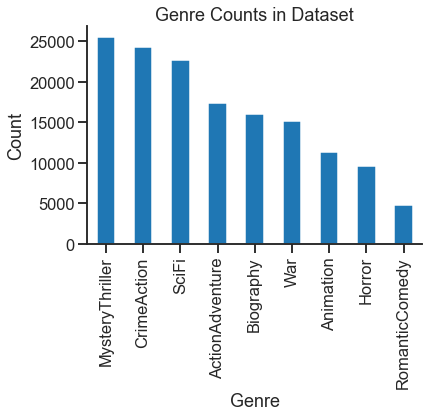

In [5]:
genre_list_ints = movies.label

genre_list_strings = []
for genre in genre_list_ints:
    genre_list_strings.append(id_to_genre[genre])
    
genre_counts = Counter(genre_list_strings)
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index')
genre_df.sort_values(by = 0, ascending=False).plot(kind='bar', legend=False)
plt.title('Genre Counts in Dataset')
plt.ylabel('Count')
plt.xlabel('Genre')
sns.despine()

In [6]:
import gensim
from gensim import models

In [7]:
filepath = os.sep.join(data_path + ['GoogleNews-vectors-negative300.bin'])
model = models.KeyedVectors.load_word2vec_format(filepath, binary=True)

In [8]:
#collect words not in the Google News w2v model
not_w2v = []

#word2vec function
def apply_words2Vec(review, mean=False):
    
    """
    apply_words2Vec()
    -applies the following transformations to the cleaned plot of a movie:
        1) removes words that are not in google's model
        2) creates a 300-dimension vector representation of each word
        3) outputes vector of vectors for plot
        If mean = True
        4) converts the resulting nd_array into a 1d_array via np.mean() and
           outputs single vector for each plot.
    -also keeps track of all words not found in google's model
    
    -inputs: cleaned_plot (string)
    
    -outputs: vector representation of plot
    
    """
    vecs=[]
    for word in review:
        #add word vector to list if it is in the google model
        try:
            vecs.append(model.word_vec(word)) 
        except:
            #if the word is not in the w2v model, add it to
            #our list of skipped words
            not_w2v.append(word)
    
    #take the column-wise mean of vecs to reduce nd_aray to 1d_array
    if mean == True:
        vecs = np.mean(vecs, axis=0)
        return vecs
    #return matrix of w2v arrays where each row is a word in the plot
    return np.stack(vecs)

In [9]:
movies['review_w2v_mean']=movies['review'].apply(lambda x: apply_words2Vec(x, mean=True))


In [17]:
#movies['review_w2v_matrix']=movies['review'].apply(lambda x: apply_words2Vec(x, mean=False))

In [11]:
print('Mean vector representations:')
print(movies.loc[0,'review_w2v_mean'].shape)

#print('Matrix representations:')
#print(movies.loc[0,'review_w2vt_matrix'].shape)

Mean vector representations:
(300,)


In [12]:
#print some of our skipped words
print(len(not_w2v))
np.random.seed(112)
print(np.random.choice(not_w2v, 50, replace=False))

21251939
['a' ' ' ' ' ' ' ' ' ' ' 'a' 'a' ' ' ' ' ' ' 'a' ' ' ' ' ' ' ' ' ' ' 'a'
 ' ' 'a' ' ' 'a' ' ' ' ' ' ' 'a' 'a' 'a' ' ' ' ' ' ' ' ' 'a' ' ' ' ' ' '
 ' ' ' ' ' ' 'a' ' ' ' ' ' ' ' ' 'a' 'a' ' ' 'a' ' ' 'a']


In [13]:
movies.head()

,review,label,review_w2v_mean
0,act end atmosphere despair mixed happy moment ...,3,"[-0.16591896, 0.1135017, -0.0020008916, 0.1438..."
1,honest go watch film negative mind anyway hear...,7,"[-0.1634469, 0.11333021, 0.00016148885, 0.1421..."
2,year gibson braveheart scottish movie false ex...,8,"[-0.15832256, 0.11841188, 0.007363681, 0.13814..."
3,change story dad really thing movie go decent ...,1,"[-0.1768371, 0.12475928, 0.00023957725, 0.1295..."
4,movie potential top line intelligent science f...,7,"[-0.14355093, 0.11203103, -0.013742916, 0.1411..."


In [16]:
filepath = os.sep.join(data_path+['moviesData.csv'])
movies.to_csv(filepath, encoding="utf-8", index=False)

In [ ]:
#for i in data.index:
#    data.iloc[i][1].split(" ")